<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/drum_nov_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# https://stackoverflow.com/questions/47566093/computer-vision-counting-small-circles-in-an-image

In [3]:
!gdown --id 1E0ZpCpeNkfXRToWOTISMEEJKN7ssolv7

Downloading...
From: https://drive.google.com/uc?id=1E0ZpCpeNkfXRToWOTISMEEJKN7ssolv7
To: /content/Tambor.jpeg
100% 19.9k/19.9k [00:00<00:00, 13.2MB/s]


In [4]:
name = 'Tambor.jpeg'
img = cv2.imread(name)
grayImage = cv2.imread(name,0)

Text(0.5, 1.0, 'drum')

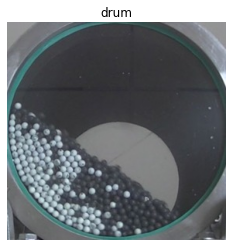

In [5]:
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title('drum')

Text(0.5, 1.0, 'black and white')

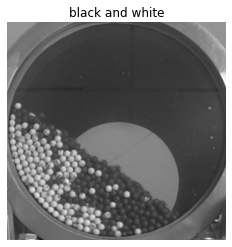

In [6]:
RGB_img = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(RGB_img)
plt.title('black and white')

In [7]:
(rows,cols)= grayImage.shape
mask = np.zeros_like(grayImage)

In [8]:
for i in range(rows):
  for j in range(cols):
    if(grayImage[i,j]<80):
      mask[i,j]=255
    else:
      mask[i,j]=0


Text(0.5, 1.0, 'excluding black parts')

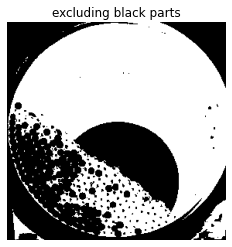

In [9]:
RGB_img = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(RGB_img)
plt.title('excluding black parts')

In [10]:
(rows,cols)= grayImage.shape
mask_oposite = np.zeros_like(grayImage)

In [11]:
for i in range(rows):
  for j in range(cols):
    if(grayImage[i,j]<80):
      mask_oposite[i,j]=0
    else:
      mask_oposite[i,j]=255

Text(0.5, 1.0, 'excluding black parts')

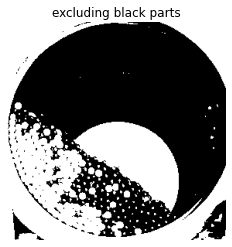

In [12]:
RGB_img = cv2.cvtColor(mask_oposite, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(RGB_img)
plt.title('excluding black parts')

In [13]:
img = grayImage
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d circles in the image.'%n_centers)

There are 124 circles in the image.


In [14]:
img = mask
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d circles in the image.'%n_centers)

There are 124 circles in the image.
